In [2]:
import stock_data

import pandas
import matplotlib
import matplotlib.pyplot 

In [3]:
%matplotlib inline
matplotlib.style.use('ggplot')

### get data

In [4]:
data = stock_data.get_all_closing_prices("../stock_csvs/")

### retain just closing prices

In [4]:
closing_prices =  data.ix[:, data.columns.get_level_values(1).isin({"close"})]

In [6]:
closing_prices.ix[:5, :5]

,a,aa,aapl,abbv,abc
,close,close,close,close,close
date,,,,,
1998-01-02,NaN,13.3511,3.95098,NaN,6.50799
1998-01-05,NaN,13.5853,3.89020,NaN,6.40419
1998-01-06,NaN,13.2817,4.60502,NaN,6.28477
1998-01-07,NaN,13.3042,4.24032,NaN,6.34839
1998-01-08,NaN,12.7533,4.39107,NaN,6.38299


### get returns

In [7]:
returns = (closing_prices.shift(-1) - closing_prices) / closing_prices

### correlation matrix

In [8]:
corr_mat = returns.corr()

In [9]:
corr_mat.ix[:5, :5]

,,a,aa,aapl,abbv,abc
,,close,close,close,close,close
a,close,1.000000,0.383146,0.361200,0.164908,0.169508
aa,close,0.383146,1.000000,0.256279,0.067920,0.205052
aapl,close,0.361200,0.256279,1.000000,0.032483,0.131073
abbv,close,0.164908,0.067920,0.032483,1.000000,0.282846
abc,close,0.169508,0.205052,0.131073,0.282846,1.000000


### for each stock, get most-correlated other stock

#### get most-correlated other stock for each stock

In [11]:
max_corrs = []
for col in corr_mat.columns:
    maximum = corr_mat[col[0]].sort_values(by='close', 
                                            ascending=False).ix[1]
    max_corrs.append((col[0],
                      maximum.name[0],
                      maximum.values[0]))

In [12]:
max_corrs[:5]

[('a', 'tel', 0.6215942479933616),
 ('aa', 'x', 0.65085342418152092),
 ('aapl', 'tel', 0.46821786745700583),
 ('abbv', 'jnj', 0.45930399309677494),
 ('abc', 'sni', 0.45766391178923288)]

#### retain as DataFrame

In [13]:
max_corrs_df = pandas.DataFrame(max_corrs, 
                                columns=['stock', 'most correlated other stock', 'correlation'])

In [14]:
max_corrs_df.head()

,stock,most correlated other stock,correlation
0,a,tel,0.621594
1,aa,x,0.650853
2,aapl,tel,0.468218
3,abbv,jnj,0.459304
4,abc,sni,0.457664


### aggregate across 'most correlated other stock' to see if we have any repeat high-correlaters

#### count number of occurences of each most-correlated stock

In [15]:
most_corr = max_corrs_df[['stock', 
                                'most correlated other stock']].groupby('most correlated other stock').count()

#### check out top ten

In [16]:
most_corr.sort_values('stock', ascending=False).ix[:10, :]

,stock
most correlated other stock,
se,59
lyb,31
amp,27
sni,26
tel,26
wyn,17
dfs,13
aee,10
pru,9


### additional analysis

#### retain top ten

In [17]:
top_ten = most_corr.sort_values('stock', ascending=False).ix[:10, :]

#### check out each occurence's correlation for each top ten stock

In [18]:
top_ten.merge(max_corrs_df[['most correlated other stock', 'correlation']], 
                              left_index=True,
                              right_on='most correlated other stock')

,stock,most correlated other stock,correlation
8,59,se,0.424120
11,59,se,0.535699
12,59,se,0.618535
17,59,se,0.647056
20,59,se,0.552324
27,59,se,0.388717
46,59,se,0.589619
59,59,se,0.489352
64,59,se,0.603600
70,59,se,0.484799


#### average across all most-correlated occurrences for each top ten stock

In [19]:
top_ten.merge(max_corrs_df[
                 ['most correlated other stock', 'correlation']], 
             left_index=True,
             right_on='most correlated other stock')[
        ['most correlated other stock', 
        'correlation']].groupby('most correlated other stock').mean()

,correlation
most correlated other stock,
aee,0.692810
amp,0.591676
cov,0.489027
dfs,0.573990
lyb,0.573352
pru,0.728927
se,0.583366
sni,0.510669
tel,0.556220


#### retain the above-described average correlations

In [20]:
top_ten_avg_corr = top_ten.merge(max_corrs_df[
                                     ['most correlated other stock', 'correlation']], 
                                 left_index=True,
                                 right_on='most correlated other stock')[
                            ['most correlated other stock', 
                            'correlation']].groupby('most correlated other stock').mean()

#### plot

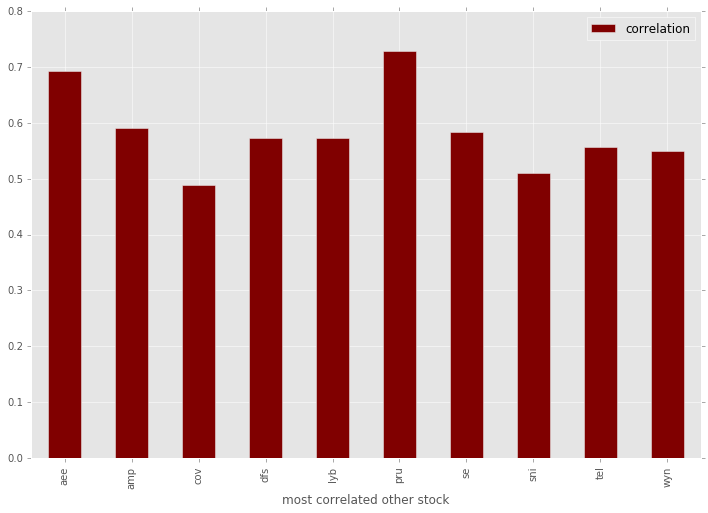

In [21]:
plot = top_ten_avg_corr.plot(kind='bar',
                            color='Maroon',
                            figsize=(12,8))

### removing NaNs

#### drop all columns for which any row contains NaN

In [22]:
closing_no_nans = closing_prices.dropna(axis=1, how='any')

#### check results

In [23]:
closing_no_nans.shape

(3926, 388)

In [24]:
closing_no_nans.ix[:5, :5]

,aa,aapl,abc,abt,ace
,close,close,close,close,close
date,,,,,
1998-01-02,13.3511,3.95098,6.50799,10.3555,22.9865
1998-01-05,13.5853,3.89020,6.40419,10.4031,22.8365
1998-01-06,13.2817,4.60502,6.28477,10.2311,23.0180
1998-01-07,13.3042,4.24032,6.34839,10.2880,23.1389
1998-01-08,12.7533,4.39107,6.38299,10.4507,22.7446
